In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor

In [17]:
data = pd.read_csv('datasets/Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [23]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [27]:
data.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

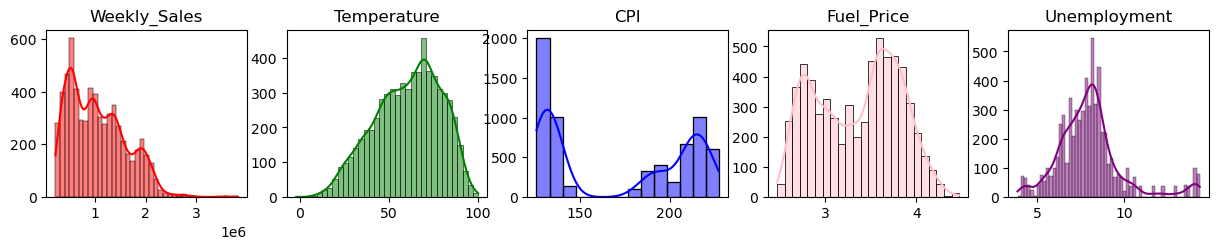

In [28]:
features = ['Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(15, 10))
colours = ['red', 'green', 'blue', 'pink', 'purple']

for i, feature in enumerate(features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[feature], color=colours[i-1], kde=True)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')

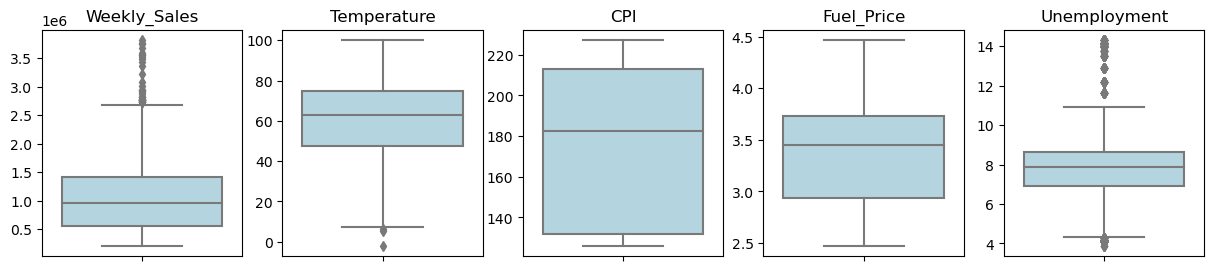

In [32]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data=data, y=feature, color='lightblue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feature)

In [33]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

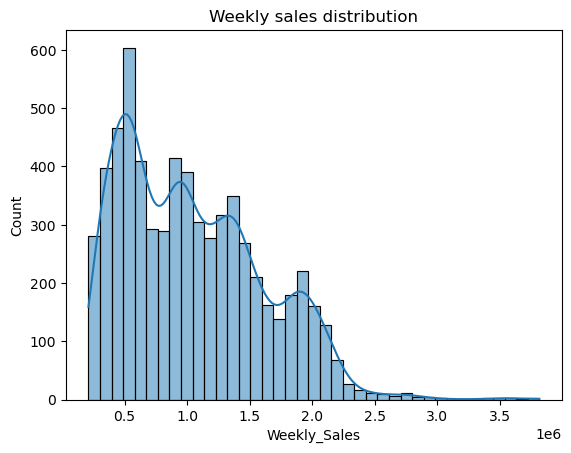

In [37]:
sns.histplot(data['Weekly_Sales'], kde=True)
plt.title('Weekly sales distribution')
plt.show()

In [39]:
features = ['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'year', 'month', 'day']
X = data[features]
y = data['Weekly_Sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [43]:
forest = RandomForestRegressor(n_estimators=100, random_state=30)
forest.fit(X_train, y_train)

forest_predictions = forest.predict(X_test)
forest_r2 = r2_score(y_test, forest_predictions)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_predictions))

print(f'R2 (forest): {forest_r2}')
print(f'RMSE (forest): {forest_rmse}')

R2 (forest): 0.9514464556753242
RMSE (forest): 122359.35391613391


In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print(f'R2 (lr): {lr_r2}')
print(f'RMSE (lr): {lr_rmse}')

R2 (lr): 0.14133477745365675
RMSE (lr): 514563.10438237194


In [47]:
gb = XGBRegressor(n_estimators=100, random_state=30)
gb.fit(X_train, y_train)

gb_predictions = gb.predict(X_test)
gb_r2 = r2_score(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

print(f'R2 (gb): {gb_r2}')
print(f'RMSE (gb): {gb_rmse}')

R2 (gb): 0.9790979354735924
RMSE (gb): 80282.5758208566


Text(0.5, 1.0, 'true v predicted')

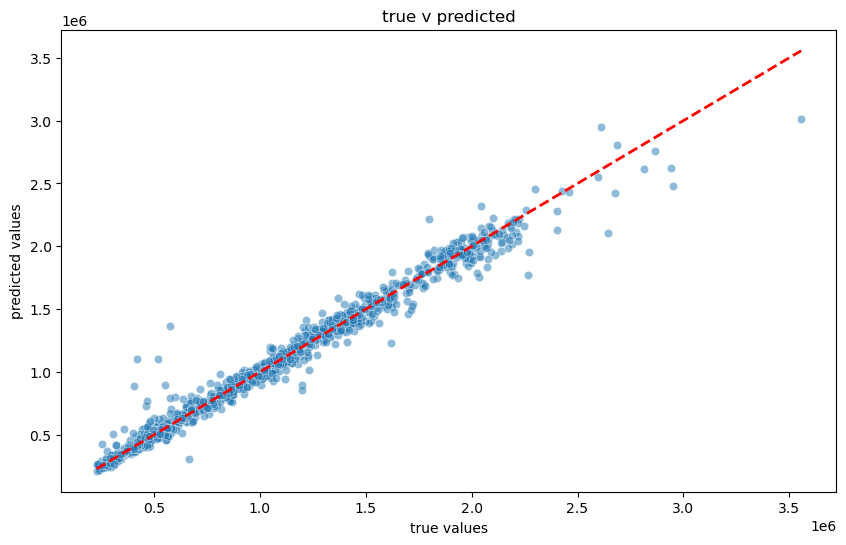

In [49]:

res = pd.DataFrame({
    'true': y_test,
    'forecast':  gb_predictions
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=res, x='true', y='forecast', alpha=0.5)

plt.plot(
    [res['true'].min(), res['true'].max()],
    [res['true'].min(), res['true'].max()],
'r--', lw=2)

plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('true v predicted')

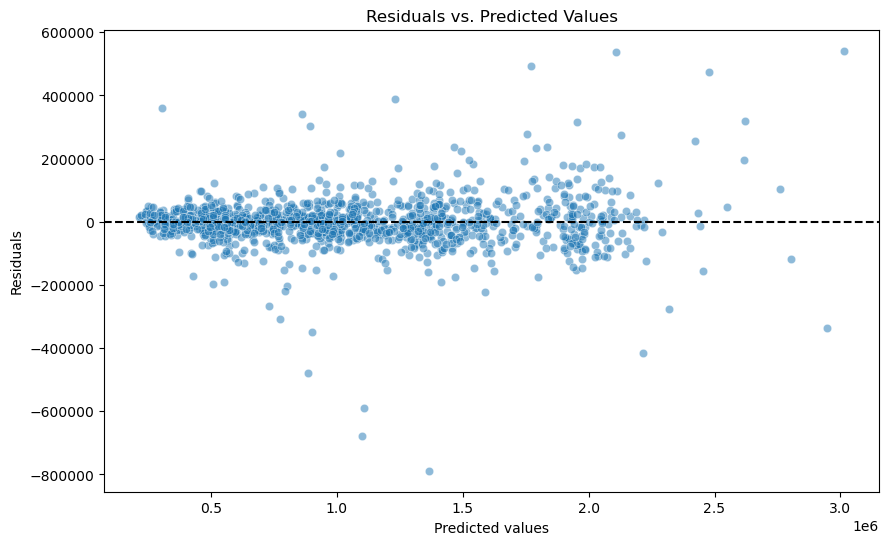

In [53]:
# Calculate residuals
res['residuals'] = res['true'] - res['forecast']

# Plot Residuals vs. Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=res, x='forecast', y='residuals', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()
